In [1]:
import os
import pandas as pd
hbn_path = "/home/ryan/Code/DMZ/hbn.csv"

### 1. The HBN column names are malformed, making csv parsing software fail or return nonsensical results

In [2]:
with open(hbn_path, "r") as f:
    columns = f.readline()
    print('Correctly formed, "Instrument,Variable"')
    print(columns[:40], '\n')
    print('Incorrectly formed, "Instrument,""Variable""')
    print(columns[6871:7100])

Correctly formed, "Instrument,Variable"
"Identifiers","ACE,ACE_01","ACE,ACE_02", 

Incorrectly formed, "Instrument,""Variable""
"BIA,""Age"","BIA,""BMC"","BIA,""BMI"","BIA,""BMR"","BIA,""DEE"","BIA,""Days_Baseline"","BIA,""ECW"","BIA,""EID"","BIA,""FFM"","BIA,""FFMI"","BIA,""FMI"","BIA,""Fat"","BIA,""Frame"","BIA,""Height"","BIA,""ICW"","BIA,""LDM"","BIA,


To fix:
1. Parse .csv, but with "," used as a delimeter rather than just ,
2. Remove all " characters from the column names in the resulting data frame

In [3]:
hbn = pd.read_csv(hbn_path, engine='python',
                  dtype="unicode", sep = '","')
hbn.columns = list(map(lambda x: x.replace('"', ''), hbn.columns))
[c for c in hbn.columns]

['Identifiers',
 'ACE,ACE_01',
 'ACE,ACE_02',
 'ACE,ACE_03',
 'ACE,ACE_04',
 'ACE,ACE_05',
 'ACE,ACE_06',
 'ACE,ACE_07',
 'ACE,ACE_08',
 'ACE,ACE_09',
 'ACE,ACE_10',
 'ACE,ACE_Score',
 'ACE,Administration',
 'ACE,Comment_ID',
 'ACE,Data_entry',
 'ACE,Days_Baseline',
 'ACE,EID',
 'ACE,PSCID',
 'ACE,START_DATE',
 'ACE,Season',
 'ACE,Site',
 'ACE,Study',
 'ACE,Visit_label',
 'ACE,Year',
 'ACE,\ufeffEID',
 'APQ_P,APQ_P_01',
 'APQ_P,APQ_P_02',
 'APQ_P,APQ_P_03',
 'APQ_P,APQ_P_04',
 'APQ_P,APQ_P_05',
 'APQ_P,APQ_P_06',
 'APQ_P,APQ_P_07',
 'APQ_P,APQ_P_08',
 'APQ_P,APQ_P_09',
 'APQ_P,APQ_P_10',
 'APQ_P,APQ_P_11',
 'APQ_P,APQ_P_12',
 'APQ_P,APQ_P_13',
 'APQ_P,APQ_P_14',
 'APQ_P,APQ_P_15',
 'APQ_P,APQ_P_16',
 'APQ_P,APQ_P_17',
 'APQ_P,APQ_P_18',
 'APQ_P,APQ_P_19',
 'APQ_P,APQ_P_20',
 'APQ_P,APQ_P_21',
 'APQ_P,APQ_P_22',
 'APQ_P,APQ_P_23',
 'APQ_P,APQ_P_24',
 'APQ_P,APQ_P_25',
 'APQ_P,APQ_P_26',
 'APQ_P,APQ_P_27',
 'APQ_P,APQ_P_28',
 'APQ_P,APQ_P_29',
 'APQ_P,APQ_P_30',
 'APQ_P,APQ_P_31',
 'APQ_

### 2. More than one unique delimter for a NA value. e.g. here, '.' and 'nan' are used. In other instances, 'n/a' is also used

In [4]:
import numpy as np
hbn = pd.read_csv(hbn_path, engine='python',
                  dtype="unicode", sep = '","')
hbn.columns = list(map(lambda x: x.replace('"', ''), hbn.columns))
print(np.unique(hbn["NLES_SR,NLES_SR_Upset_Avg"].as_matrix()))

['.' '0' '0.67' '1' '1.2' '1.33' '1.4' '1.5' '1.6' '1.67' '1.71' '1.75' '2'
 '2.07' '2.11' '2.17' '2.2' '2.22' '2.25' '2.27' '2.29' '2.33' '2.37E+11'
 '2.4' '2.43' '2.5' '2.57' '2.6' '2.62' '2.64' '2.67' '2.7' '2.71' '2.75'
 '2.78' '2.8' '2.83' '2.87' '2.88' '2.89' '2.9' '3' '3.1' '3.13' '3.17'
 '3.2' '3.22' '3.25' '3.33' '3.38' '3.4' '3.45' '3.5' '3.55' '3.56' '3.57'
 '3.6' '3.63' '3.67' '3.7' '3.71' '3.75' '3.77' '3.8' '3.86' '4' '4.08'
 '4.11' '4.17' '4.18' '4.2' '4.25' '4.33' '4.38' '4.43' '4.45' '4.5' '4.6'
 '4.7' '5' '5.75' '6.14E+13' 'nan']


To fix:
1. Replace all instances of '.', 'nan', 'NaN', 'NA', 'n/a' in the data frame with one value (here, we use a special value in numpy called np.nan)

In [5]:
print("Before replacement number of nans:", hbn.isnull().sum().sum())

Before replacement number of nans: 0


In [6]:
hbn.replace(".", np.nan, inplace=True)
hbn.replace("nan", np.nan, inplace=True)
hbn.replace("n/a", np.nan, inplace=True)
hbn.replace("NaN", np.nan, inplace=True)
hbn.replace("NA", np.nan, inplace=True)

In [7]:
print("After replacement number of nans:", hbn.isnull().sum().sum())

After replacement number of nans: 4890879


### The NLES_SR,NLES_SR_Upset_Avg column has a few extreme outliers which may just be bad entries

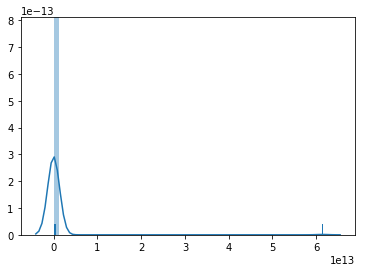

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
array1 = hbn["NLES_SR,NLES_SR_Upset_Avg"].as_matrix().astype(float)
array1 = array1[~np.isnan(array1)]
sns.distplot(array1, rug=True)
plt.show()

To fix: We just remove the column entirely

In [9]:
del hbn["NLES_SR,NLES_SR_Upset_Avg"]

### The DailyMeds,hours_sleep column has a few extreme outliers which may just be bad entries

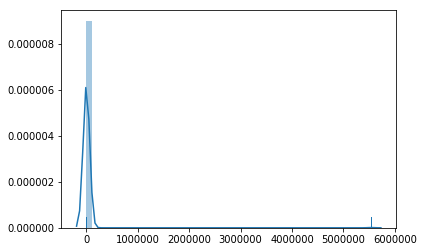

In [10]:
array1 = hbn["DailyMeds,hours_sleep"].as_matrix().astype(float)
array1 = array1[~np.isnan(array1)]
sns.distplot(array1, rug=True)
plt.show()

To fix: We just remove the column entirely

In [11]:
del hbn["DailyMeds,hours_sleep"]

### Many categorical variables are redundant with minor changes, e.g. 
* upper case vs. lower case
  * ADHD Inattentive Type vs. ADHD Inattentive type
* presence of hyphens
  * Attention Deficit Hyperactivity Disorder vs. Attention-Deficit Hyperactivity Disorder vs. Attention-Deficit/Hyperactivity Disorder vs. Attention-Deficit/Hyperactivity Disorder *with a space at the end*
* Including other special characters
  * Tourette's Disorder vs. Tourettes Disorder

In [12]:
array1 = hbn["ConsensusDx,DX_01"]
array1 = array1[[False if x is np.nan else True for x in array1]]
np.unique(array1)

array(['ADHD Inattentive Type', 'ADHD Inattentive type',
       'ADHD-Combined Type', 'ADHD-Hyperactive/Impulsive Type',
       'ADHD-Inattentive Type', 'Acute Stress Disorder',
       'Adjustment Disorder, with Mixed Emotions and Conduct',
       'Adjustment Disorders', 'Agoraphobia',
       'Attention Deficit Hyperactivity Disorder',
       'Attention Deficit Hyperactivity Disorder Combined Presentation',
       'Attention-Deficit Hyperactivity Disorder',
       'Attention-Deficit/Hyperactivity Disorder',
       'Attention-Deficit/Hyperactivity Disorder ',
       'Autism Spectrum Disorder', 'Bipolar I Disorder',
       'Bipolar II Disorder', 'Borderline Intellectual Functioning',
       'Cannabis Use Disorder', 'Conduct Disorder-Childhood-onset type',
       'Disruptive Mood Dysregulation Disorder', 'Enuresis',
       'Gender Dysphoria in Children', 'Generalized Anxiety Disorder',
       'Intellectual DIsability (moderate)',
       'Intellectual Disability-Mild', 'Intellectual Disabi

To fix:
1. If the categorical array is x = [s1, s2, ..., sn], Hash each string si to si', with the hash function removing all non alpha-numeric characters and making the entire string lower case
2. For each string si', replace all sj where sj' = si' with si 

In [24]:
import re
def stringhash(string):
    return re.sub(r'\W+', '', string).lower()

In [25]:
columns = np.array(list(map(stringhash, array1)))
for a, c in zip(array1, columns):
    array1[columns == c] = a

In [26]:
np.unique(array1)

array(['ADHD-Combined Type', 'ADHD-Hyperactive/Impulsive Type',
       'ADHD-Inattentive Type', 'Acute Stress Disorder',
       'Adjustment Disorder, with Mixed Emotions and Conduct',
       'Adjustment Disorders', 'Agoraphobia',
       'Attention Deficit Hyperactivity Disorder Combined Presentation',
       'Attention-Deficit/Hyperactivity Disorder ',
       'Autism Spectrum Disorder', 'Bipolar I Disorder',
       'Bipolar II Disorder', 'Borderline Intellectual Functioning',
       'Cannabis Use Disorder', 'Conduct Disorder-Childhood-onset type',
       'Disruptive Mood Dysregulation Disorder', 'Enuresis',
       'Gender Dysphoria in Children', 'Generalized Anxiety Disorder',
       'Intellectual Disability-Mild', 'Intellectual Disability-Moderate',
       'Intellectual Disability-Severe', 'Intermittent Explosive Disorder',
       'Language Disorder',
       'Learning Disorder with Impairment in Reading ',
       'Major Depressive Disorder', 'No Diagnosis Given',
       'Obsessive-Com